<a href="https://colab.research.google.com/github/cinthia-cientistadedados/MBA_FM2S/blob/main/iniciandoBibliotecas_TechTrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercícios iniciais da Biblioteca **Pandas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Buscando os dados dos ultimos anos

In [ ]:
df = pd.read_csv('TechTrends.csv')
df

,Idade,Gênero,Renda_Anual,Valor_Total_Gasto,Data_Compra,Categoria,Compra
0,35,F,13555,9747,2024-04-27,TV,Não
1,63,M,11153,6178,2020-09-13,Camera,Não
2,63,M,22816,2561,2022-02-23,TV,Não
3,53,F,22272,9001,2020-07-13,TV,Não
4,63,M,29394,325,2024-04-26,TV,Não
...,...,...,...,...,...,...,...
9995,54,F,24438,322,2023-06-04,Smartphone,Não
9996,58,F,18507,6432,2022-02-22,TV,Sim
9997,34,M,25748,1554,2023-01-03,Smartphone,Não
9998,32,M,21857,8463,2020-01-31,Camera,Sim


Analise preditiva

In [ ]:
# Adicionando coluna 'Ano' a partir da coluna 'Data_Compra'
df['Ano'] = pd.DatetimeIndex(df['Data_Compra']).year

# Previsão de vendas
X = df.drop(columns=['Compra', 'Data_Compra', 'Ano'])  # Features
y = df['Compra']  # Target

# Convertendo variáveis categóricas em variáveis dummy (binárias)
X = pd.get_dummies(X)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Criando e treinando o modelo ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.49775


Correlação entre variáveis

In [ ]:
# Correlação entre variáveis importantes
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Remover infinitos e substituir por NaN
correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan)
print("Matriz de correlação:\n", correlation_matrix)

Matriz de correlação:
                       Idade  Renda_Anual  Valor_Total_Gasto       Ano
Idade              1.000000    -0.000365          -0.008611 -0.007696
Renda_Anual       -0.000365     1.000000           0.002810 -0.001128
Valor_Total_Gasto -0.008611     0.002810           1.000000  0.000649
Ano               -0.007696    -0.001128           0.000649  1.000000


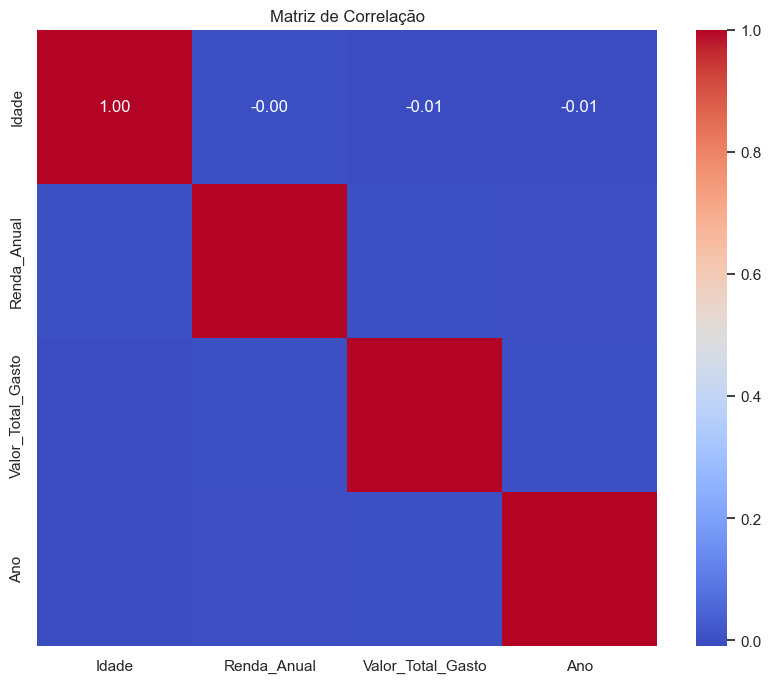

In [ ]:
# Criando um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Entendendo a distribuição da idade dos clientes

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


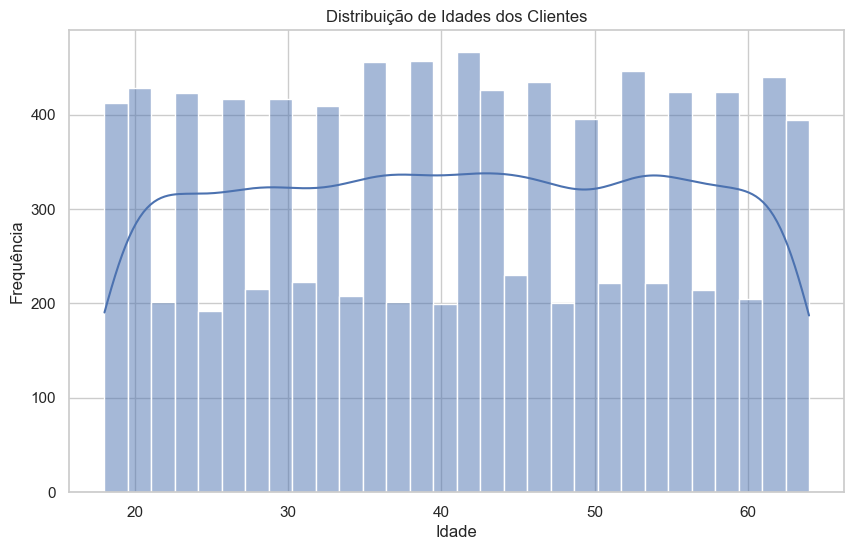

In [ ]:
# Gráficos usando matplotlib e seaborn
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Remover infinitos e substituir por NaN
idade_sem_inf = df['Idade'].replace([np.inf, -np.inf], np.nan).dropna()

# Gráfico 1: Distribuição de Idades
plt.figure(figsize=(10, 6))
sns.histplot(idade_sem_inf, bins=30, kde=True)
plt.title('Distribuição de Idades dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Visualizando o total gasto por categoria

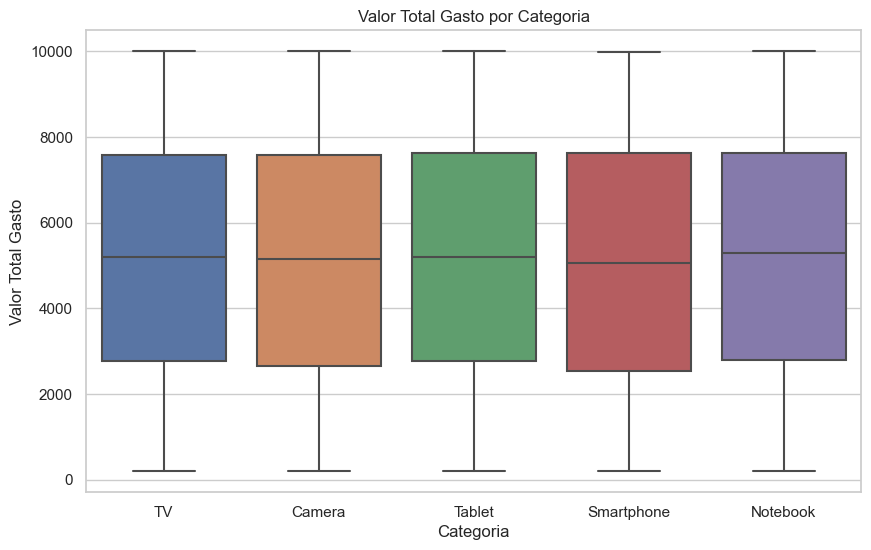

In [ ]:
# Gráfico 2: Valor Total Gasto por Categoria
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria', y='Valor_Total_Gasto', data=df)
plt.title('Valor Total Gasto por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total Gasto')
plt.show()

Entendendo o comportamento de compras por gênero

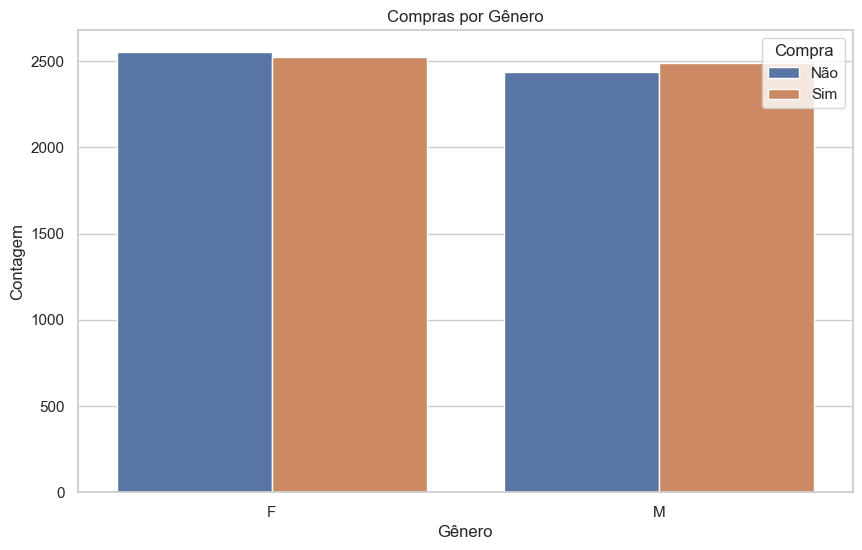

In [ ]:
# Gráfico 3: Compras por Gênero
plt.figure(figsize=(10, 6))
sns.countplot(x='Gênero', hue='Compra', data=df)
plt.title('Compras por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

Visualizando o total de compras ao longo dos anos

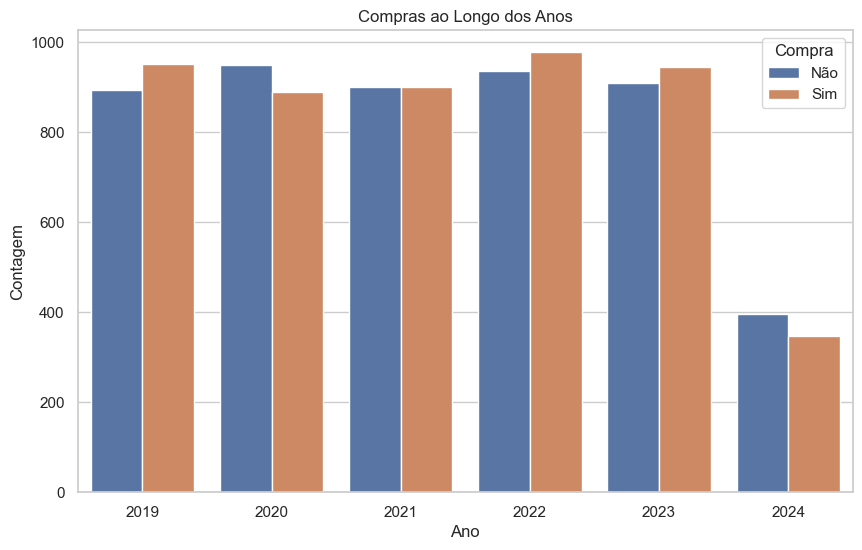

In [ ]:
# Gráfico 5: Compras ao longo dos anos
plt.figure(figsize=(10, 6))
sns.countplot(x='Ano', hue='Compra', data=df)
plt.title('Compras ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.show()

Quantidade de compras por categoria

In [ ]:
# Informações importantes para a empresa
# Total de vendas por categoria
vendas_por_categoria = df[df['Compra'] == 'Sim']['Categoria'].value_counts()
print("Total de vendas por categoria:\n", vendas_por_categoria)

Total de vendas por categoria:
 Categoria
Camera        1038
TV            1012
Notebook      1006
Smartphone    1000
Tablet         956
Name: count, dtype: int64


Quantidade de comrpas por ano

In [ ]:
# Total de vendas por ano
vendas_por_ano = df[df['Compra'] == 'Sim']['Ano'].value_counts()
print("Total de vendas por ano:\n", vendas_por_ano)

Total de vendas por ano:
 Ano
2022    978
2019    952
2023    945
2021    900
2020    889
2024    348
Name: count, dtype: int64


QUal o gasto médio de compra por categoria

In [ ]:
# Gasto médio por cliente por categoria
gasto_medio_categoria = df[df['Compra'] == 'Sim'].groupby('Categoria')['Valor_Total_Gasto'].mean()
print("Gasto médio por cliente por categoria:\n", gasto_medio_categoria)

Gasto médio por cliente por categoria:
 Categoria
Camera        5137.690751
Notebook      5207.993042
Smartphone    5166.116000
TV            5098.313241
Tablet        5256.154812
Name: Valor_Total_Gasto, dtype: float64


Qual a idade média dos cliente que compram

In [ ]:
# Idade média dos clientes que compram
idade_media_compradores = df[df['Compra'] == 'Sim']['Idade'].mean()
print("Idade média dos clientes que compram:", idade_media_compradores)

Idade média dos clientes que compram: 41.10295291300878


Qual a renda média dos clientes que compram

In [ ]:
# Renda média dos clientes que compram
renda_media_compradores = df[df['Compra'] == 'Sim']['Renda_Anual'].mean()
print("Renda média dos clientes que compram:", renda_media_compradores)

Renda média dos clientes que compram: 16177.221468475658
